In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here
train = pd.read_csv('train.csv')
train = train.drop(['Id','customer.id'],1)
train.isnull().sum()

train.select_dtypes(include='object').columns

#train['credit.policy'] =train['credit.policy'].astype('category').cat.codes

train.corr()
#train.info()

train['dti']=train['dti'].astype(int)
train['revol.util']=train['revol.util'].astype(int)
train['installment']=train['installment'].astype(int)
train['days.with.cr.line']=train['days.with.cr.line'].astype(int)
train['log.annual.inc']=train['log.annual.inc'].astype(int)
train['int.rate']=train['int.rate'].str.replace('%','')
train['int.rate']=train['int.rate'].astype(float)
train['int.rate']=train['int.rate'].astype(int)


train.head()
# Code ends here

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,Yes,debt_consolidation,12,689,11,14,722,4291,13171,51,0,Less than 5,No,Yes
1,Yes,credit_card,10,485,10,12,752,5789,14857,31,0,Less than 5,Yes,Yes
2,Yes,debt_consolidation,12,121,11,1,692,3391,12135,85,0,Less than 5,No,Yes
3,No,all_other,15,348,11,11,687,5370,10631,35,0,Less than 10,No,Yes
4,Yes,debt_consolidation,14,344,10,11,672,2429,10544,57,0,Less than 5,Yes,Yes


In [3]:
train.select_dtypes(include='object').columns


Index(['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs',
       'paid.back.loan'],
      dtype='object')

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

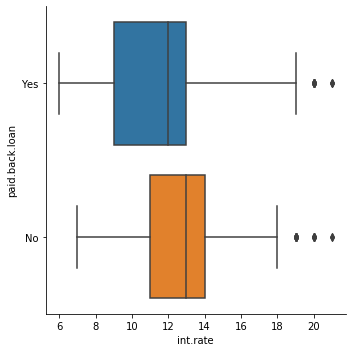

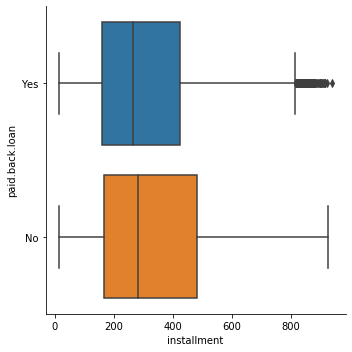

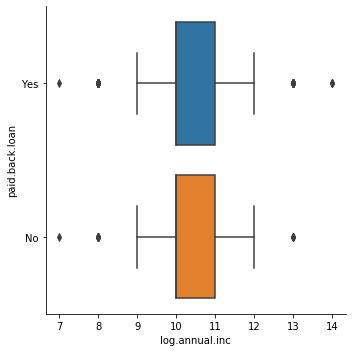

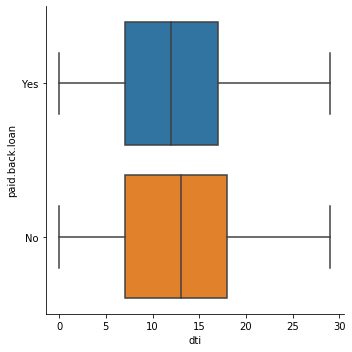

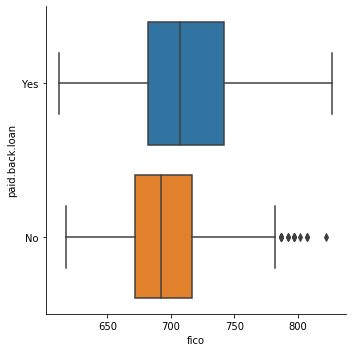

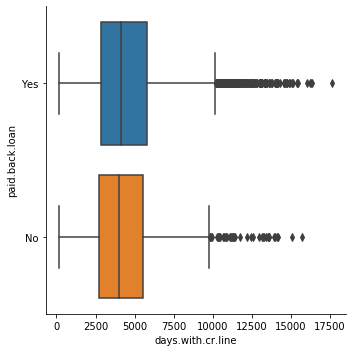

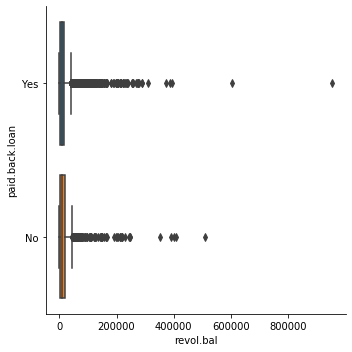

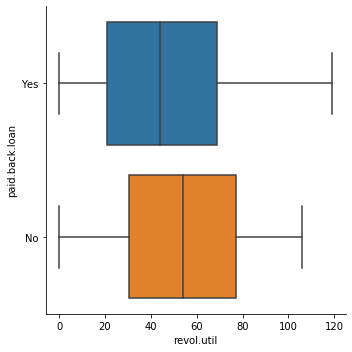

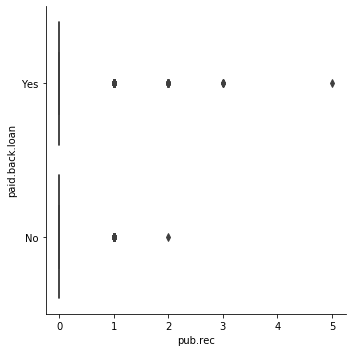

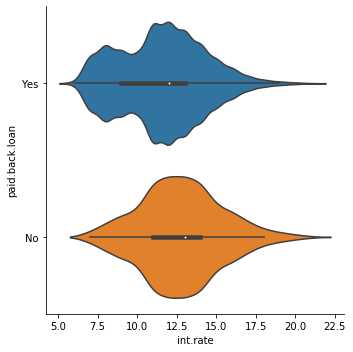

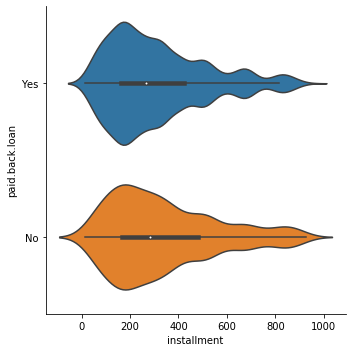

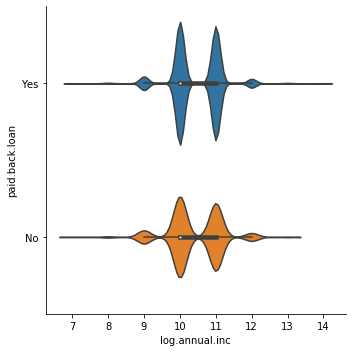

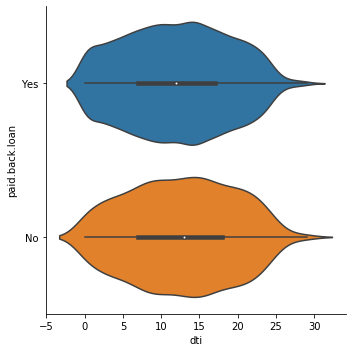

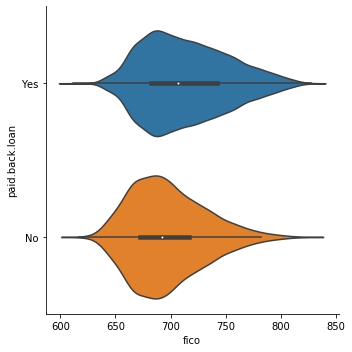

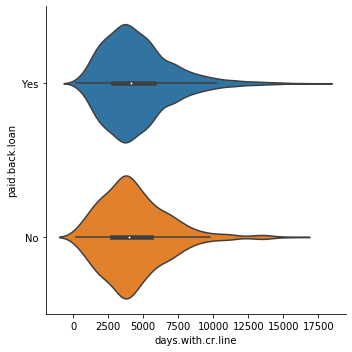

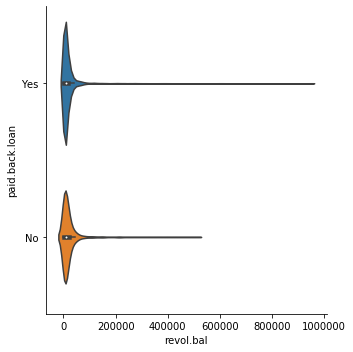

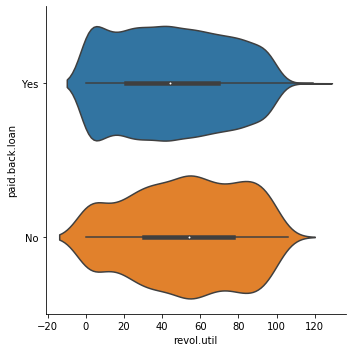

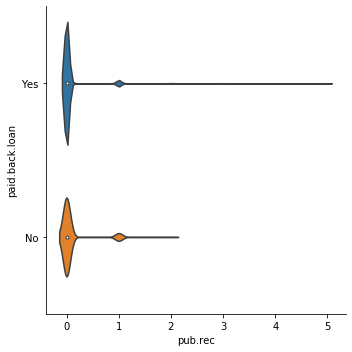

In [4]:
#Code starts here
trainn=train.select_dtypes(include='number').columns

for cols in trainn:
    sns.catplot(x=cols, y='paid.back.loan', data= train, kind='box')
    
for cols in trainn:
    sns.catplot(x=cols, y='paid.back.loan', data= train, kind='violin')



# Code ends here.

In [6]:
train.select_dtypes('number').columns



Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec'],
      dtype='object')

(7049, 14)

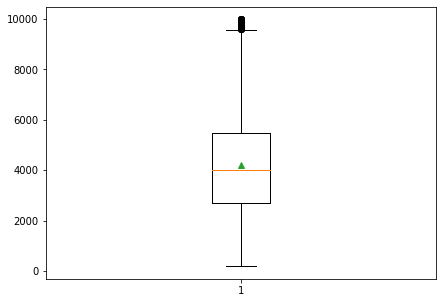

In [7]:
plt.figure(figsize=(7,5))
train= train[train['installment']<780]
train= train[train['days.with.cr.line']<10000]

plt.boxplot(train['days.with.cr.line'],showmeans=True)
train.shape

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [8]:

#le.fit(['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs'])
train['credit.policy'] =train['credit.policy'].astype('category').cat.codes
train['purpose'] =train['purpose'].astype('category').cat.codes
train['inq.last.6mths'] =train['inq.last.6mths'].astype('category').cat.codes
train['delinq.2yrs'] =train['delinq.2yrs'].astype('category').cat.codes


train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,1,2,12,689,11,14,722,4291,13171,51,0,3,0,Yes
1,1,1,10,485,10,12,752,5789,14857,31,0,3,1,Yes
2,1,2,12,121,11,1,692,3391,12135,85,0,3,0,Yes
3,0,0,15,348,11,11,687,5370,10631,35,0,0,0,Yes
4,1,2,14,344,10,11,672,2429,10544,57,0,3,1,Yes


In [15]:
# Code Starts here
from sklearn import tree

X = train.drop('paid.back.loan',1)
y= train['paid.back.loan']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

dt1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt1.fit(X_train,y_train)

pred = dt1.predict(X_test)
accuracy_score(pred, y_test)
X_train.shape
# Code ends here

(5639, 13)

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [20]:
# Code Starts here
test = pd.read_csv('test.csv')
testt = test.drop(['Id','customer.id'],1)

testt['dti']=testt['dti'].astype(int)
testt['revol.util']=testt['revol.util'].astype(int)
testt['installment']=testt['installment'].astype(int)
testt['days.with.cr.line']=testt['days.with.cr.line'].astype(int)
testt['log.annual.inc']=testt['log.annual.inc'].astype(int)
testt['int.rate']=testt['int.rate'].str.replace('%','')
testt['int.rate']=testt['int.rate'].astype(float)
testt['int.rate']=testt['int.rate'].astype(int)

testt['credit.policy'] =testt['credit.policy'].astype('category').cat.codes
testt['purpose'] =testt['purpose'].astype('category').cat.codes
testt['inq.last.6mths'] =testt['inq.last.6mths'].astype('category').cat.codes
testt['delinq.2yrs'] =testt['delinq.2yrs'].astype('category').cat.codes

testt.head()
predd = dt1.predict(testt)

output = pd.DataFrame({'Id': test.Id, 'paid.back.loan': predd})
output.to_csv('decision.csv', index=False)
output

#Code ends here

,Id,paid.back.loan
0,5468,Yes
1,7530,Yes
2,501,Yes
3,2690,Yes
4,3691,Yes
...,...,...
1911,1912,Yes
1912,8342,Yes
1913,7898,Yes
1914,4288,Yes
